### Import

In [1]:
import os
import sys
import json
import csv
import calendar
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from termcolor import colored
from gboml import GbomlGraph
from gboml.compiler.classes import Expression 
import argparse 
from statistics import mean
import seaborn  
import matplotlib.colors as mcolors
import matplotlib
from IPython.display import display

# Add the directory containing GBOML_function to the Python path
# sys.path.append(os.path.abspath('C:/Users/Administrateur/Desktop/Master-thesis_Younès/OneDrive/Bureau/Master Thesis/'))

sys.path.append(os.path.abspath('C:/Users/yaita/OneDrive/Bureau/Master Thesis/'))
import GBOML_function as gf

sys.path.append(os.path.abspath('C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/'))
import process_funct as pf

### Folder Location

In [2]:
current_dir = os.getcwd() 
results_folder = os.path.join(current_dir, "Results")
plot_folder = os.path.join(current_dir, "Plots")

### Initialization of the dictionary 

In [3]:
# Import all the JSON files and transform them into dictionaries

# Bel_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "2050_Belgium_model_base_case_efuels_and_17TWh_demand.json"))))
# Bel_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "2050_Belgium_model_base_case_efuels_and_flat_demand_7days.json"))))
Bel_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "2050_Belgium_model_base_case_efuels_and_flat_demand_1years.json"))))
base_cluster = gf.MakeMeReadable(gf.json.load(open(os.path.join(current_dir, "Clusters", "3_clusters_Belgium_base_case1year.json"))))

Bel_cluster_dict = dict()
base_cluster_dict = dict()
# name_file = '2050_Belgium_model_base_case_efuels_and_17TWh_demand.json' 
# name_file = '2050_Belgium_model_base_case_efuels_and_flat_demand_7days.json' 
name_file = '2050_Belgium_model_base_case_efuels_and_flat_demand_1years.json' 

file_path = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file  # path to the json file
with open (file_path, 'r') as myfile:
    data = myfile.read() 
Bel_cluster_dict = json.loads(data) 
        


name_file_base = '3_clusters_Belgium_base_case1year.json'
file_path_base = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file_base  # path to the json file
with open (file_path_base, 'r') as myfile:
    data_base = myfile.read()
base_cluster_dict = json.loads(data_base)

# scenarios = ['base_case']
# sensitive = ['0']
# Bel_cluster_dict = dict()

# for scenario in scenarios:
#     Bel_cluster_dict[scenario] = dict()
#     for value in sensitive:
#         name_file = '2050_Belgium_model_base_case_efuels_and_17TWh_demand.json' 
#         file_path = 'C:/Users/yaita/OneDrive/Bureau/Master Thesis/Belgium Model - Younès/Clusters/' + name_file  # path to the json file
#         with open (file_path, 'r') as myfile:
#             data = myfile.read() 
#         dictionary = json.loads(data)
#         Bel_cluster_dict[scenario][value] = {}
#         Bel_cluster_dict[scenario][value] = dictionary
 

### Time horizon setting

In [4]:
time_horizon = Bel_cluster.model.horizon 

# Main


## Template

- Variables 

In [5]:
e_variable = ['e_produced','e_consumed','e_discharged', 'e_charged', 'e_imported', 'e_exported', 'e_forward_out', 'e_reverse_in', 'e_curtailement','e_balanced']
h2_variable = ['h2_produced','h2_consumed','h2_discharged', 'h2_charged', 'h2_imported', 'h2_exported']
co2_variable = ['co2_produced','co2_consumed','co2_discharged', 'co2_charged', 'co2_imported', 'co2_exported']
ng_variable = ['ng_produced','ng_consumed','ng_discharged', 'ng_charged', 'ng_imported', 'ng_exported']

- Parameter 

In [6]:
e_parameter = ['capex', 'fom', 'max_capacity']

- Global parameter (generally for demand)

In [7]:
e_demand = ['demand_el', 'demand_el_ht', 'demand_for_electric_vehicle'] 


### Dictionary

In [17]:
e_dict = pf.get_all_from_variable_and_parameter(Bel_cluster_dict, variable = e_variable, global_parameter= e_demand, parameter= e_parameter, to_print='no')
e_obj = gf.MakeMeReadable(e_dict)

#### Global dictionary

In [15]:
elec_table = pf.transform_dict_into_table_several_column(e_dict) 

,variables,capacities,parameters,global_parameters
DENMARK,"{'e_produced': {'PV': [0.0, 0.0, 0.0, 0.0, 0.0...",{'e_produced': {'PV': {'Preinstalled capacity'...,"{'capex': {'PV': [610], 'WIND_OFFSHORE': [1995...",NaN
DEUTSCHLAND,"{'e_produced': {'PV': [0.0, 0.0, 0.0, 0.0, 0.0...",{'e_produced': {'PV': {'Preinstalled capacity'...,"{'capex': {'PV': [610], 'WIND_OFFSHORE': [1995...",NaN
FRANCE,"{'e_produced': {'NUCLEAR': [15.048, 15.2, 15.0...",{'e_produced': {'NUCLEAR': {'Preinstalled capa...,"{'capex': {'NUCLEAR': [4700], 'PV': [610], 'WI...",NaN
HV_OFF_ZB,"{'e_forward_out': [5.520575749484215, 5.718554...",{},{},NaN
HV_ZB_INL,"{'e_forward_out': [6.214425185386625, 6.214425...",{},{},NaN
INLAND,"{'e_produced': {'BIOMASS': [0.0, 0.0, 0.0, 0.0...",{'e_produced': {'BIOMASS': {'Preinstalled capa...,"{'capex': {'BIOMASS': [1700], 'CCGT': [750], '...",NaN
LUXEMBOURG,"{'e_produced': {'PV': [0.0, 0.0, 0.0, 0.0, 0.0...",{'e_produced': {'PV': {'Preinstalled capacity'...,"{'capex': {'PV': [610], 'WIND_OFFSHORE': [1995...",NaN
NETHERLANDS,"{'e_produced': {'PV': [0.0, 0.0, 0.0, 0.0, 0.0...",{'e_produced': {'PV': {'Preinstalled capacity'...,"{'capex': {'PV': [610], 'WIND_OFFSHORE': [1995...",NaN
OFFSHORE,"{'e_produced': {'FUEL_CELLS': [0.0, 0.0, 0.0, ...",{'e_produced': {'FUEL_CELLS': {'Preinstalled c...,"{'capex': {'DESALINATION': [28.08], 'ELECTROLY...",NaN
PIPE_H2_OFF_ZB,"{'e_consumed': [0.0002592148544062599, 0.00025...",{'e_consumed': {}},{},NaN


#### Variable dictionary

In [10]:
e_var_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(e_obj.variables)) 

,DENMARK,DEUTSCHLAND,FRANCE,HV_OFF_ZB,HV_ZB_INL,INLAND,LUXEMBOURG,NETHERLANDS,OFFSHORE,PIPE_H2_OFF_ZB,PIPE_H2_ZB_INL,PIPE_NG_ZB_INL,UNITED_KINGDOM,ZEEBRUGGE
e_produced,"{'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9...","{'NUCLEAR': [15.048, 15.2, 15.048, 14.896, 15....",NaN,NaN,"{'BIOMASS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'PV': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","{'FUEL_CELLS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,"{'NUCLEAR': [5.039999999999999, 5.095999999999...","{'FUEL_CELLS': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e_imported,"[0.20262198, 0.20283065, 0.20398065, 0.2057799...","[0.5228939177, 0.524741819, 0.5305620648999999...","[1.0509202796203931, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,"[9.879000000000001e-06, 3.7380000000000005e-06...","[0.49743128959999994, 0.5050783832, 0.51035028...",NaN,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
e_forward_out,NaN,NaN,NaN,"[5.520575749484215, 5.718554149484216, 5.79473...","[6.214425185386625, 6.214425185386625, 6.21442...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_reverse_in,NaN,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_consumed,NaN,NaN,NaN,NaN,NaN,"{'BIOETH_PLANTS': [0.0, 0.0, 0.0, 0.0, 0.0, 0....",NaN,NaN,"{'DESALINATION': [0.00011634909949899736, 0.00...","[0.0002592148544062599, 0.0002592148544062599,...","[0.012470868135197145, 0.0028753910227816305, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,"{'DAC': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
e_discharged,NaN,NaN,NaN,NaN,NaN,"{'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",NaN,NaN,"{'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",NaN,NaN,NaN,NaN,"{'BATTERIES': [1.1041580849400074, 0.896375537..."
e_charged,NaN,NaN,NaN,NaN,NaN,"{'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",NaN,NaN,"{'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",NaN,NaN,NaN,NaN,"{'BATTERIES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
e_balanced,NaN,NaN,NaN,NaN,NaN,"{'BALANCE': [6.001936631649242, 6.526275709065...",NaN,NaN,"{'BALANCE': [5.936362171289046, 6.149242171289...",NaN,NaN,NaN,NaN,"{'BALANCE': [0.9714507573462771, 0.76366821023..."


#### Capacity dictionary

In [26]:
e_cap_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(e_obj.capacities)) 

,DENMARK,DEUTSCHLAND,FRANCE,HV_OFF_ZB,HV_ZB_INL,INLAND,LUXEMBOURG,NETHERLANDS,OFFSHORE,PIPE_H2_OFF_ZB,PIPE_H2_ZB_INL,PIPE_NG_ZB_INL,UNITED_KINGDOM,ZEEBRUGGE
e_produced,"{'PV': {'Preinstalled capacity': 22.2, 'Added ...","{'PV': {'Preinstalled capacity': 268.215, 'Add...","{'NUCLEAR': {'Preinstalled capacity': 15.2, 'A...",NaN,NaN,"{'BIOMASS': {'Preinstalled capacity': 0, 'Adde...","{'PV': {'Preinstalled capacity': 0.726, 'Added...","{'PV': {'Preinstalled capacity': 94.856, 'Adde...","{'FUEL_CELLS': {'Preinstalled capacity': 0.0, ...",NaN,NaN,NaN,"{'NUCLEAR': {'Preinstalled capacity': 5.6, 'Ad...","{'FUEL_CELLS': {'Preinstalled capacity': 0.0, ..."
e_imported,"{'PRODUCTION': {'Preinstalled capacity': 0, 'A...","{'PRODUCTION': {'Preinstalled capacity': 0, 'A...","{'PRODUCTION': {'Preinstalled capacity': 0, 'A...",NaN,NaN,NaN,"{'PRODUCTION': {'Preinstalled capacity': 0, 'A...","{'PRODUCTION': {'Preinstalled capacity': 0, 'A...",NaN,NaN,NaN,NaN,"{'PRODUCTION': {'Preinstalled capacity': 0, 'A...",NaN
e_consumed,NaN,NaN,NaN,NaN,NaN,"{'BIOETH_PLANTS': {'Preinstalled capacity': 0,...",NaN,NaN,"{'DESALINATION': {'Preinstalled capacity': 0, ...",{},{},{},NaN,"{'DAC': {'Preinstalled capacity': 0.0, 'Added ..."
e_discharged,NaN,NaN,NaN,NaN,NaN,"{'BATTERIES': {'Preinstalled capacity': 0, 'Ad...",NaN,NaN,"{'BATTERIES': {'Preinstalled capacity': 0, 'Ad...",NaN,NaN,NaN,NaN,"{'BATTERIES': {'Preinstalled capacity': 0, 'Ad..."
e_charged,NaN,NaN,NaN,NaN,NaN,"{'BATTERIES': {'Preinstalled capacity': 0, 'Ad...",NaN,NaN,"{'BATTERIES': {'Preinstalled capacity': 0, 'Ad...",NaN,NaN,NaN,NaN,"{'BATTERIES': {'Preinstalled capacity': 0, 'Ad..."


#### Parameter dictionary

In [27]:
e_par_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(e_obj.parameters)) 

,DENMARK,DEUTSCHLAND,FRANCE,HV_OFF_ZB,HV_ZB_INL,INLAND,LUXEMBOURG,NETHERLANDS,OFFSHORE,PIPE_H2_OFF_ZB,PIPE_H2_ZB_INL,PIPE_NG_ZB_INL,UNITED_KINGDOM,ZEEBRUGGE
capex,"{'PV': [610], 'WIND_OFFSHORE': [1995.0], 'WIND...","{'PV': [610], 'WIND_OFFSHORE': [1995.0], 'WIND...","{'NUCLEAR': [4700], 'PV': [610], 'WIND_OFFSHOR...",NaN,NaN,"{'BIOMASS': [1700], 'CCGT': [750], 'CHP': [850...","{'PV': [610], 'WIND_OFFSHORE': [1995.0], 'WIND...","{'PV': [610], 'WIND_OFFSHORE': [1995.0], 'WIND...","{'DESALINATION': [28.08], 'ELECTROLYSIS_PLANTS...",NaN,NaN,NaN,"{'NUCLEAR': [4700], 'PV': [610], 'WIND_OFFSHOR...","{'DAC': [4000.0], 'ELECTROLYSIS_PLANTS': [333...."
fom,"{'PV': [13.0], 'WIND_OFFSHORE': [32.0], 'WIND_...","{'PV': [13.0], 'WIND_OFFSHORE': [32.0], 'WIND_...","{'NUCLEAR': [105], 'PV': [13.0], 'WIND_OFFSHOR...",NaN,NaN,"{'BIOETH_PLANTS': [534.8], 'BIOMASS': [38.4], ...","{'PV': [13.0], 'WIND_OFFSHORE': [32.0], 'WIND_...","{'PV': [13.0], 'WIND_OFFSHORE': [32.0], 'WIND_...","{'DESALINATION': [0.0], 'ELECTROLYSIS_PLANTS':...",NaN,NaN,NaN,"{'NUCLEAR': [105], 'PV': [13.0], 'WIND_OFFSHOR...","{'DAC': [20.0], 'ELECTROLYSIS_PLANTS': [6.6666..."
max_capacity,"{'PV': [22.2], 'WIND_OFFSHORE': [23], 'WIND_ON...","{'PV': [268.215], 'WIND_OFFSHORE': [52.199], '...","{'NUCLEAR': [15.2], 'PV': [158.048], 'WIND_OFF...",NaN,NaN,"{'BIOMASS': [0], 'BIOMETHANE': [2.411047856253...","{'PV': [0.726], 'WIND_OFFSHORE': [0], 'WIND_ON...","{'PV': [94.856], 'WIND_OFFSHORE': [60.137], 'W...","{'ELECTROLYSIS_PLANTS': [100], 'FUEL_CELLS': [...",NaN,NaN,NaN,"{'NUCLEAR': [5.6], 'PV': [93.538], 'WIND_OFFSH...","{'DAC': [3.5], 'ELECTROLYSIS_PLANTS': [100], '..."


#### Global parameter dictionary

In [28]:
e_glob_par_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(e_obj.global_parameters)) 

,demand_el,demand_el_ht,daily_demand_for_electric_vehicle
demand_el,"[9.366556594185775, 8.96168425917003, 8.587137...",NaN,NaN
demand_el_ht,NaN,"[4.921060588770484, 4.8088405754825265, 4.9392...",NaN
daily_demand_for_electric_vehicle,NaN,NaN,"[54.560475875743464, 54.560475875743464, 21.82..."


#### test

In [29]:
belg= e_obj.variables.INLAND.e_produced
elec_table = pf.transform_dict_into_table_several_column(pf.convert_mmr_to_dict(belg)) 

,BIOMASS,CCGT,CHP,FUEL_CELLS,NUCLEAR,OCGT,PV,WASTE,WIND_ONSHORE
0,0.0,5.948502,0.0,0.0,0.0,0.0,0.0,0.0,1.70883
1,0.0,5.948502,0.0,0.0,0.0,0.0,0.0,0.0,1.84995
2,0.0,5.948502,0.0,0.0,0.0,0.0,0.0,0.0,1.96965
3,0.0,5.886335,0.0,0.0,0.0,0.0,0.0,0.0,2.01591
4,0.0,5.890463,0.0,0.0,0.0,0.0,0.0,0.0,2.01591
...,...,...,...,...,...,...,...,...,...
8755,0.0,5.074282,0.0,0.0,0.0,0.0,0.0,0.0,4.14972
8756,0.0,4.294413,0.0,0.0,0.0,0.0,0.0,0.0,4.28562
8757,0.0,4.294413,0.0,0.0,0.0,0.0,0.0,0.0,4.40082
8758,0.0,4.579310,0.0,0.0,0.0,0.0,0.0,0.0,4.43835


### Template

In [30]:
e_prod = pf.merge_dictionaries(pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_produced), pf.convert_mmr_to_dict(e_obj.variables.OFFSHORE.e_produced))

#### Normal plot

Zooming the data:
In day:
✅ Plot saved: plots\elec_prod_INLAND_step_by_day.pdf


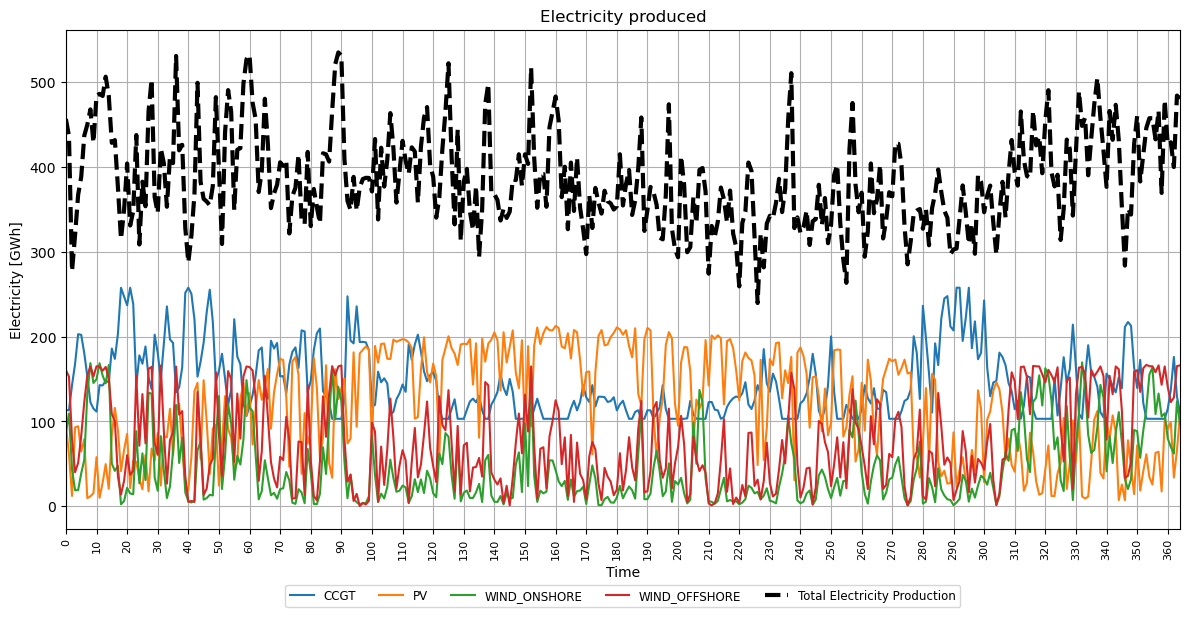

In week:
✅ Plot saved: plots\elec_prod_INLAND_step_by_week.pdf


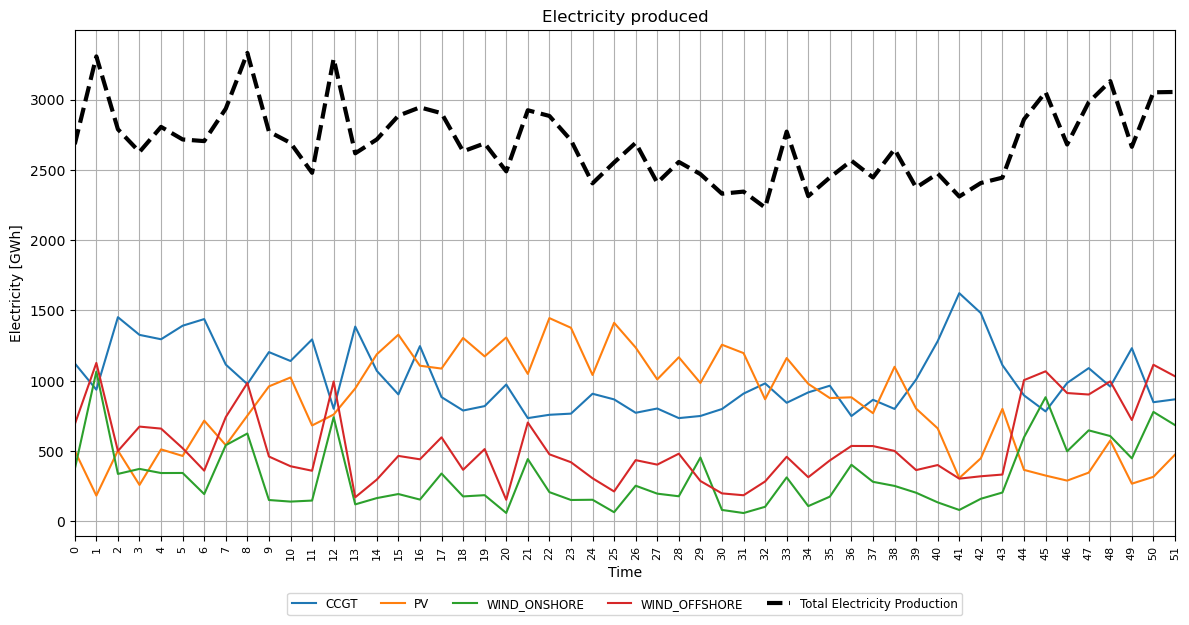

In month:
✅ Plot saved: plots\elec_prod_INLAND_step_by_month.pdf


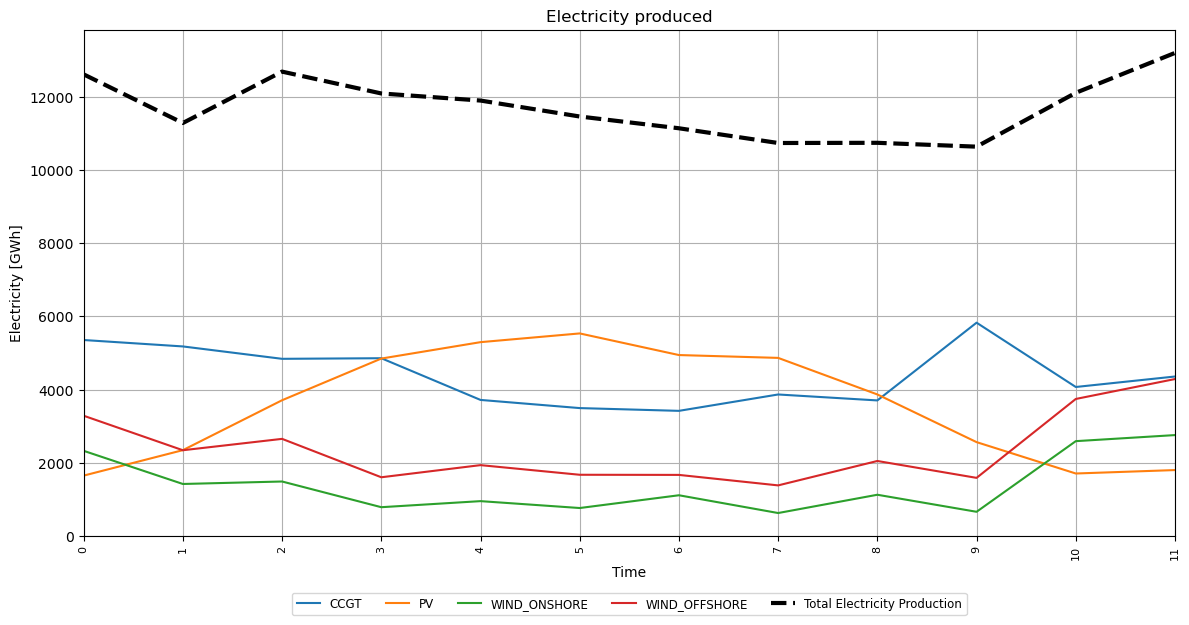

In [31]:
step = ['hour', 'day', 'week', 'month']
zooms = ['day', 'week', 'month']

print(colored('Zooming the data:', 'white','on_blue'))
for zoom in zooms:
    
    print(colored(f'In {zoom}:', 'blue'))
    data_zoomed = pf.zoom_with_timestep(e_prod, zero_nodes='yes', zoom=zoom)  
    sum = pf.plot_maker_new(data = data_zoomed, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',  
                        title = 'Electricity produced', save_name = 'elec_prod_INLAND_step_by_'+ zoom, rotation = 90, print_skip='no') 

#### Zooming plot

##### Season

✅ Plot saved: c:\Users\yaita\OneDrive\Bureau\Master Thesis\Belgium Model - Younès\Plots\elec_prod_INLAND_in_spring_step_by_day.pdf


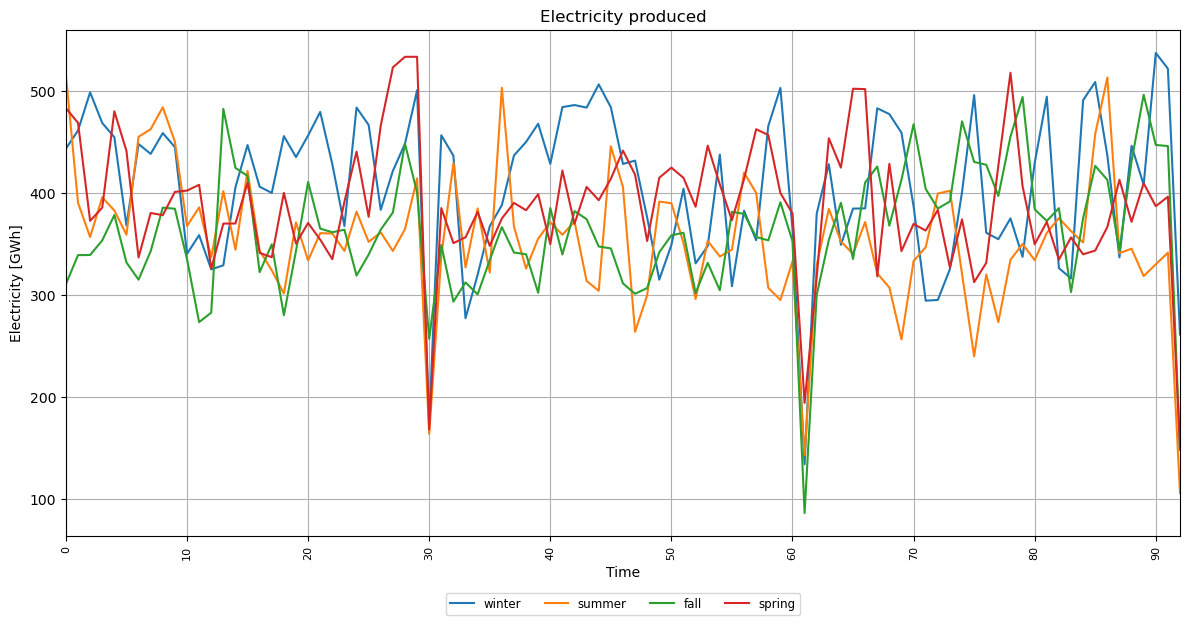

✅ Plot saved: c:\Users\yaita\OneDrive\Bureau\Master Thesis\Belgium Model - Younès\Plots\elec_prod_INLAND_in_spring_step_by_week.pdf


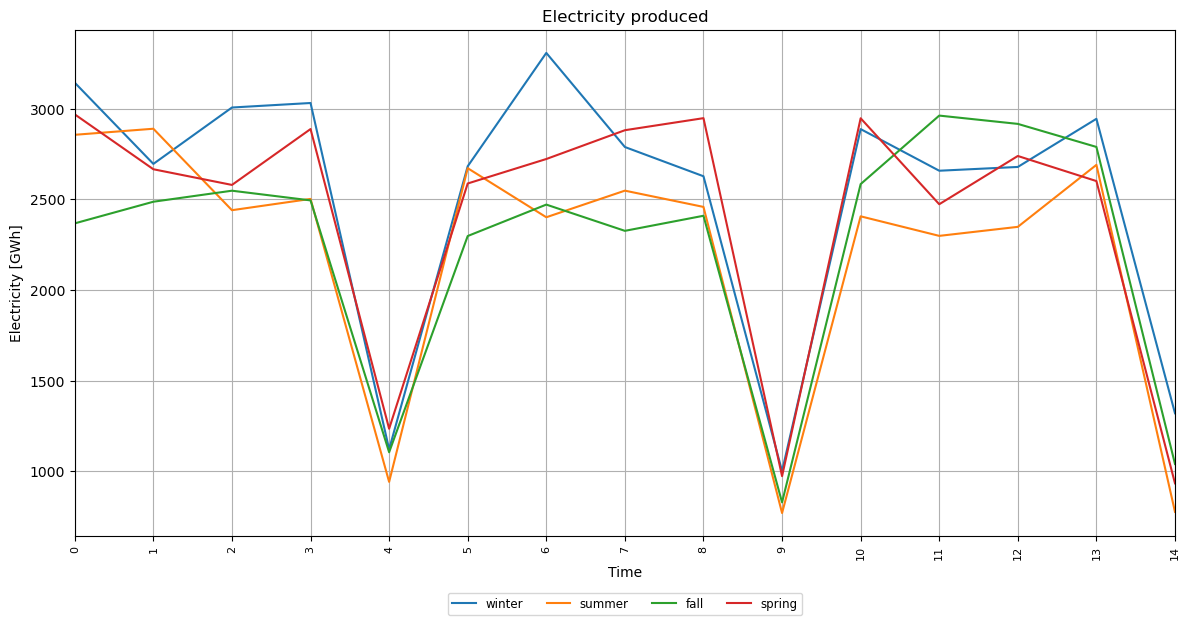

In [32]:
steps = ['day', 'week']
seasons = ['winter', 'summer', 'fall', 'spring']


for step in steps:
    
    data_total = {}
    data_sum = {}
    for season in seasons:

        data = pf.precise_zoom_with_timestep(data=e_prod, zoom=season, number=3, step=step)   
        data_total[season] = pf.get_total_timeseries_dict(data) 
    
    pf.plot_maker_new(data=data_total, type_var = 'Production', x_label='Time', y_label='Electricity [GWh]', total_plot='no',
                                    title='Electricity produced', save_name= 'elec_prod_INLAND_in_' + season + '_step_by_' + step , rotation=90, plot_folder=plot_folder)

##### Specific zoom : day, week, month 
- Here choose the 3rd zoom meaning 3rd day of the year, 3rd week of the year and the 3rd month of the year

Zooming the data:
Zoom = day | Step = hour
✅ Plot saved: plots\elec_prod_INLAND_in_the_6th_day_step_by_hour.pdf


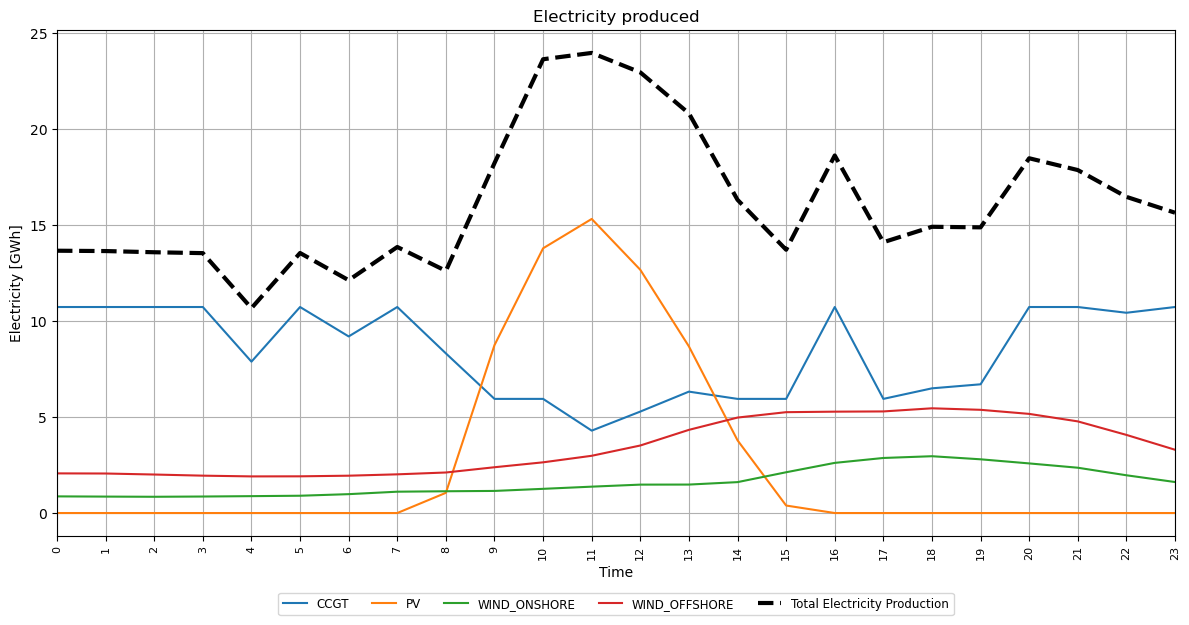

Zoom = week | Step = hour
✅ Plot saved: plots\elec_prod_INLAND_in_the_6th_week_step_by_hour.pdf


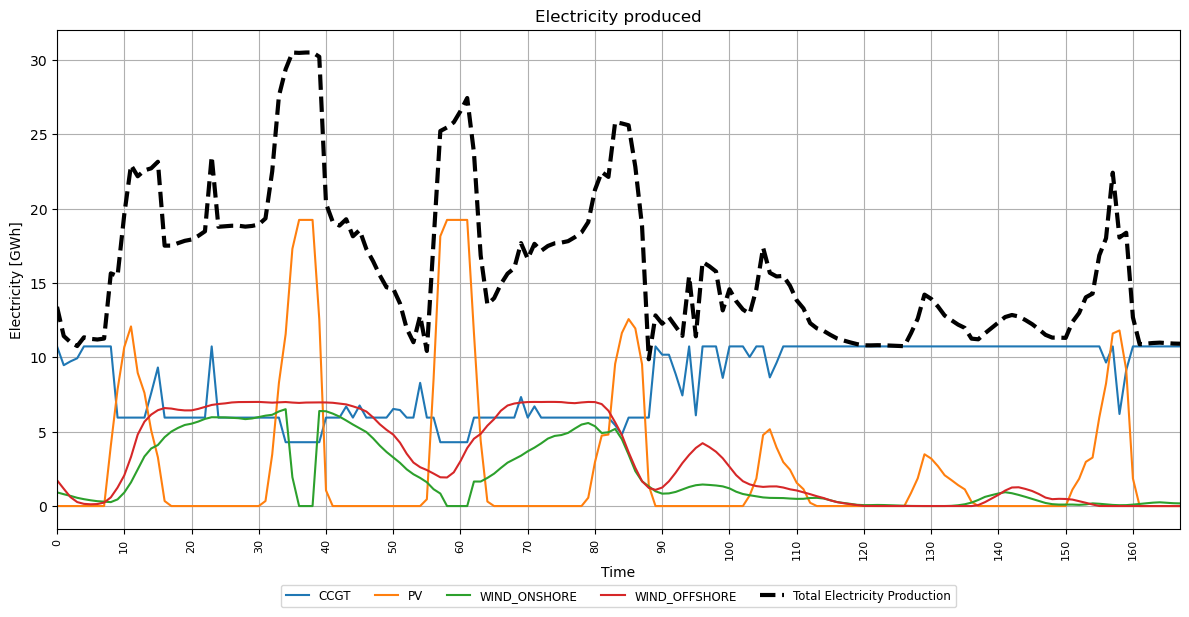

Zoom = week | Step = day
✅ Plot saved: plots\elec_prod_INLAND_in_the_6th_week_step_by_day.pdf


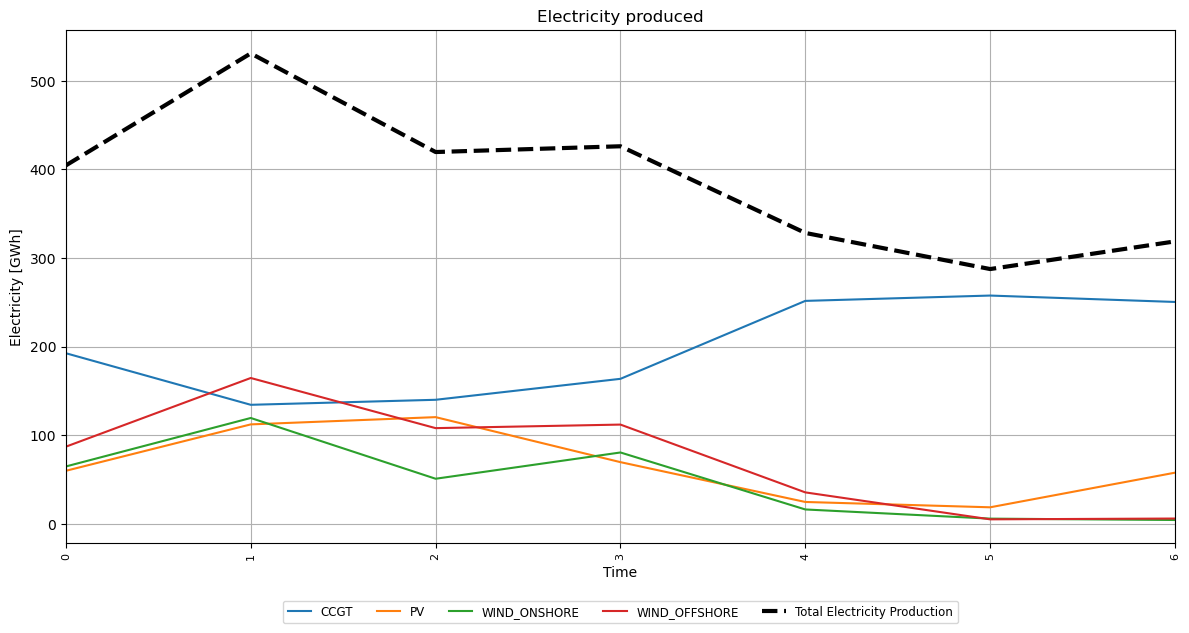

Zoom = month | Step = hour
✅ Plot saved: plots\elec_prod_INLAND_in_the_6th_month_step_by_hour.pdf


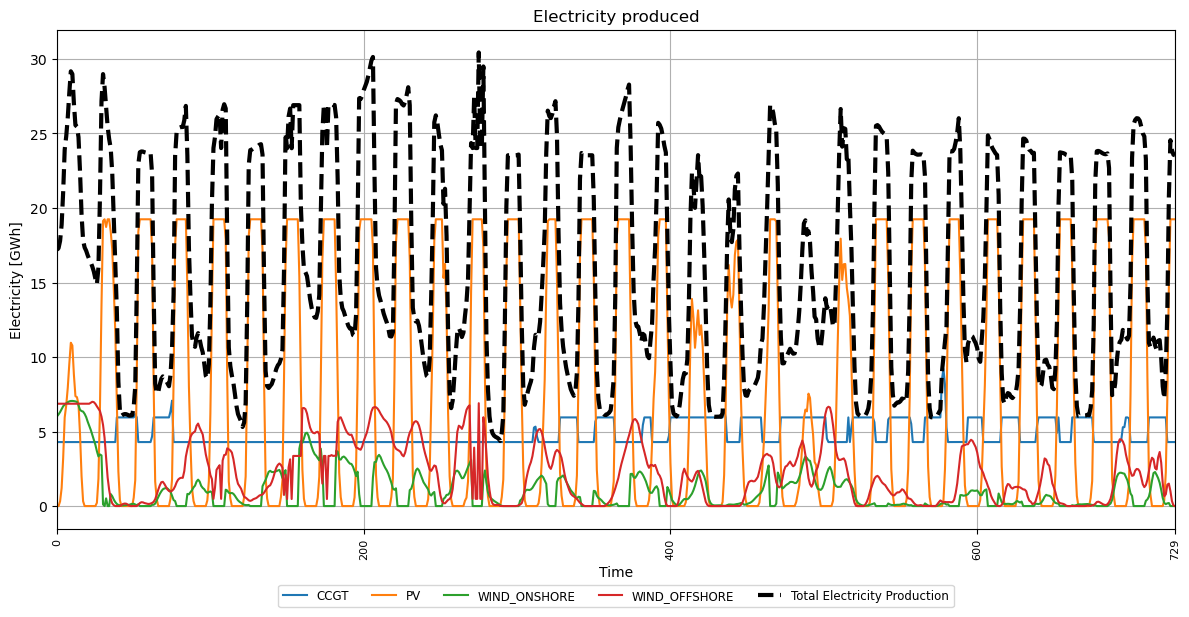

Zoom = month | Step = day
✅ Plot saved: plots\elec_prod_INLAND_in_the_6th_month_step_by_day.pdf


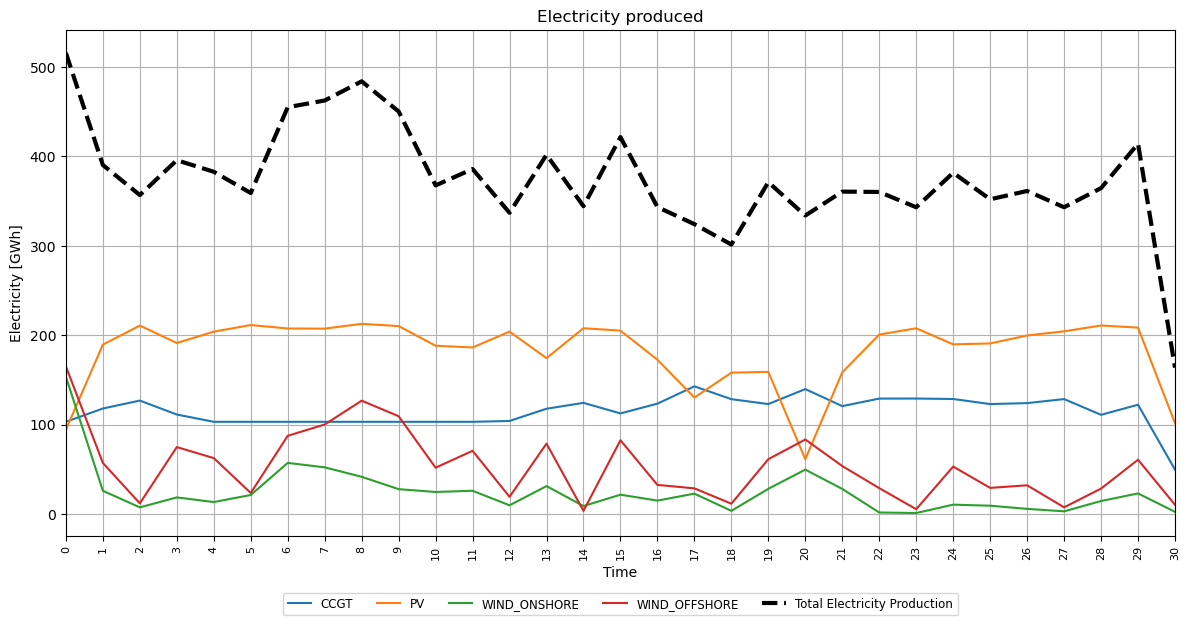

Zoom = month | Step = week
✅ Plot saved: plots\elec_prod_INLAND_in_the_6th_month_step_by_week.pdf


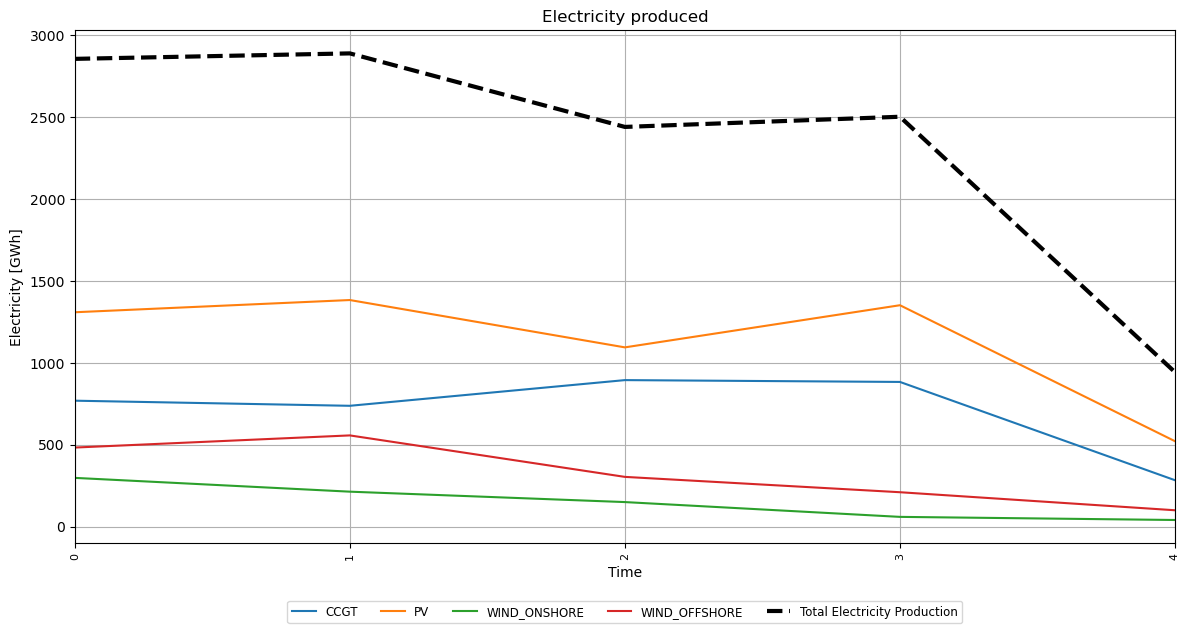

In [33]:
steps = ['hour', 'day', 'week']
zooms = ['day', 'week', 'month']
precise = 6
print(colored('Zooming the data:', 'white', 'on_blue'))

invalid_combinations = [ ('day', 'day'), ('day', 'week'), ('week', 'week'), ]

for zoom in zooms:
    for step in steps:

        if (zoom, step) in invalid_combinations: 
            continue

        print(colored(f'Zoom = {zoom} | Step = {step}', 'blue'))

        data_zoomed = pf.precise_zoom_with_timestep(data=e_prod, zero_nodes='yes', zoom=zoom, number=precise, step=step)

        sum = pf.plot_maker_new(data=data_zoomed, type_var='Electricity Production', x_label='Time', y_label='Electricity [GWh]',
                                title='Electricity produced', save_name= 'elec_prod_INLAND_in_the_' + f'{precise}th' + '_'+ zoom + '_step_by_' + step, 
                                rotation=90, print_skip='no')

##### Change time step, time start index, time end index

- start, step and end is changed

Step changed by 24:
Total is plot:
✅ Plot saved: plots\elec_prod_INLAND_specific_zoom_from_2000_to_5000_step_by_24.pdf


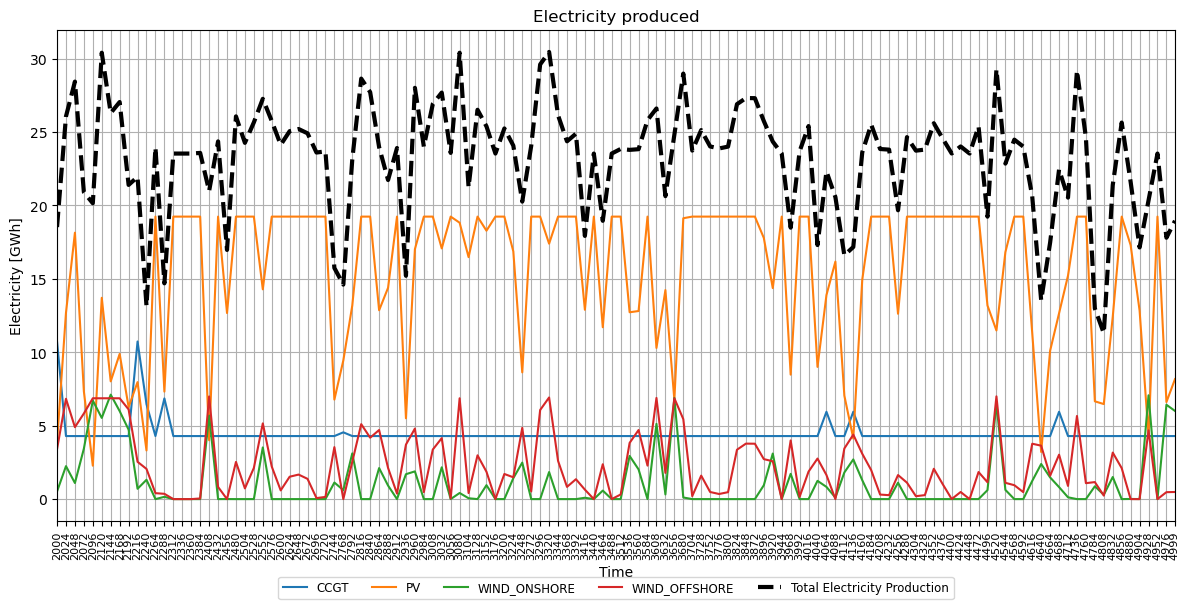

Step changed by 100:
Total is plot:
✅ Plot saved: plots\elec_prod_INLAND_specific_zoom_from_2000_to_5000_step_by_100.pdf


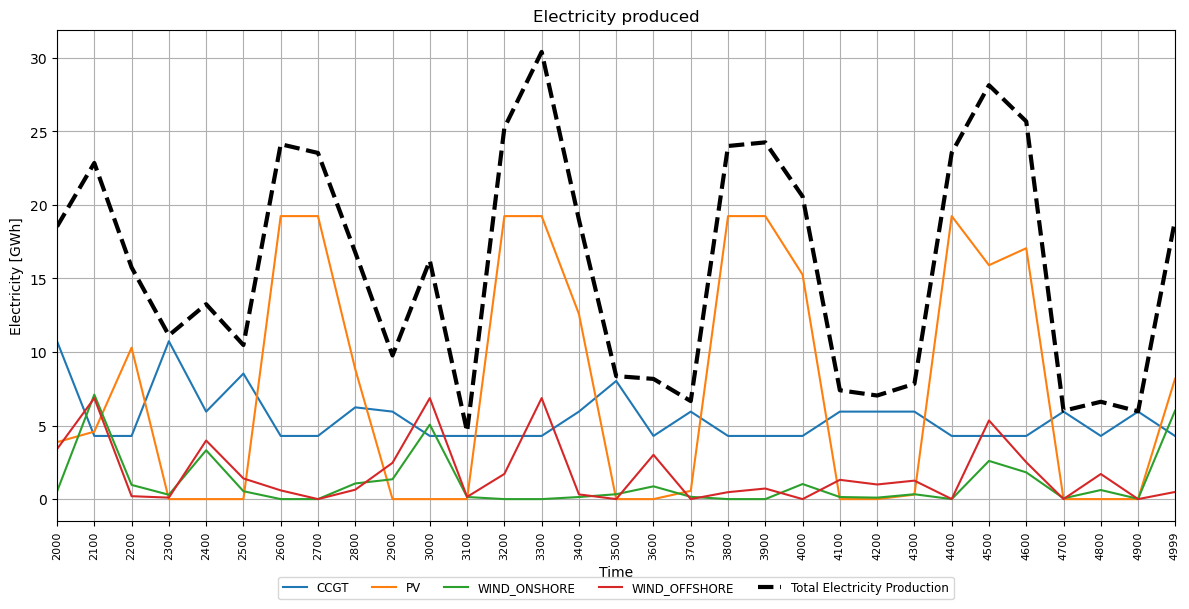

Step changed by 500:
Total is plot:
✅ Plot saved: plots\elec_prod_INLAND_specific_zoom_from_2000_to_5000_step_by_500.pdf


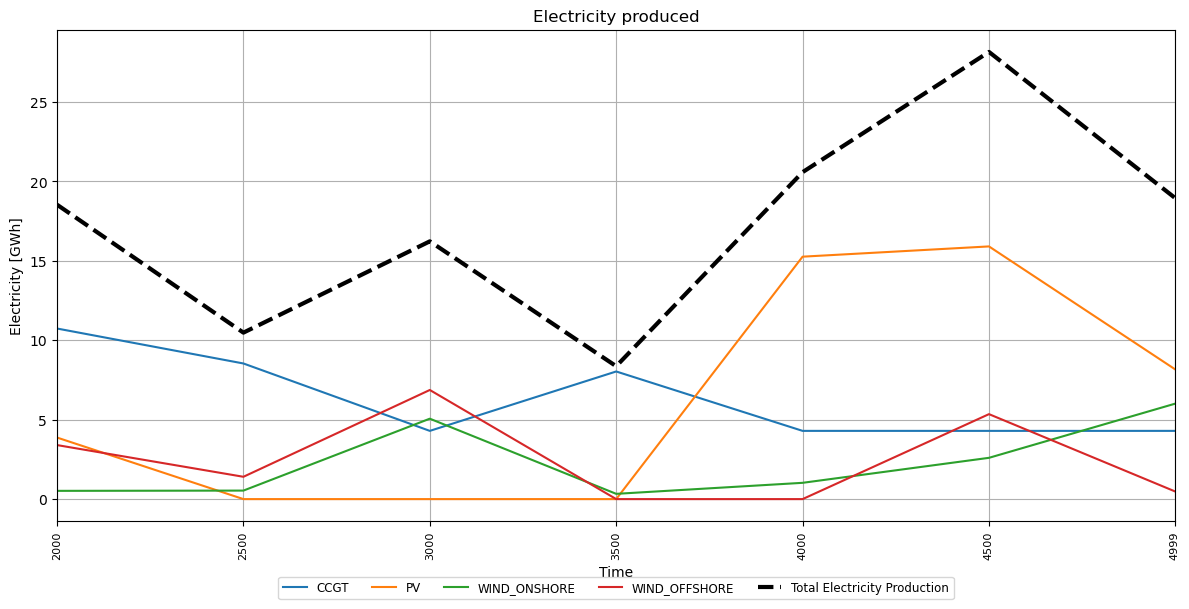

In [34]:
steps = [24, 100, 500]
start = 2000
end = 5000
for step in steps:
    print(colored(f'Step changed by {step}:', 'white', 'on_blue'))
    print(colored('Total is plot:', 'blue'))
    new_data, xticks = pf.get_new_format(data=e_prod, start_index=start, end_index=end, step=step, xticks='yes')
    sum = pf.plot_maker_new(data = new_data, type_var = 'Electricity Production', x_label = 'Time', y_label = 'Electricity [GWh]',
                        xticks= xticks, title = 'Electricity produced', save_name = f'elec_prod_INLAND_specific_zoom_from_{start}_to_{end}_step_by_{step}' ,rotation = 90, print_skip='no')
    

#### Box plot

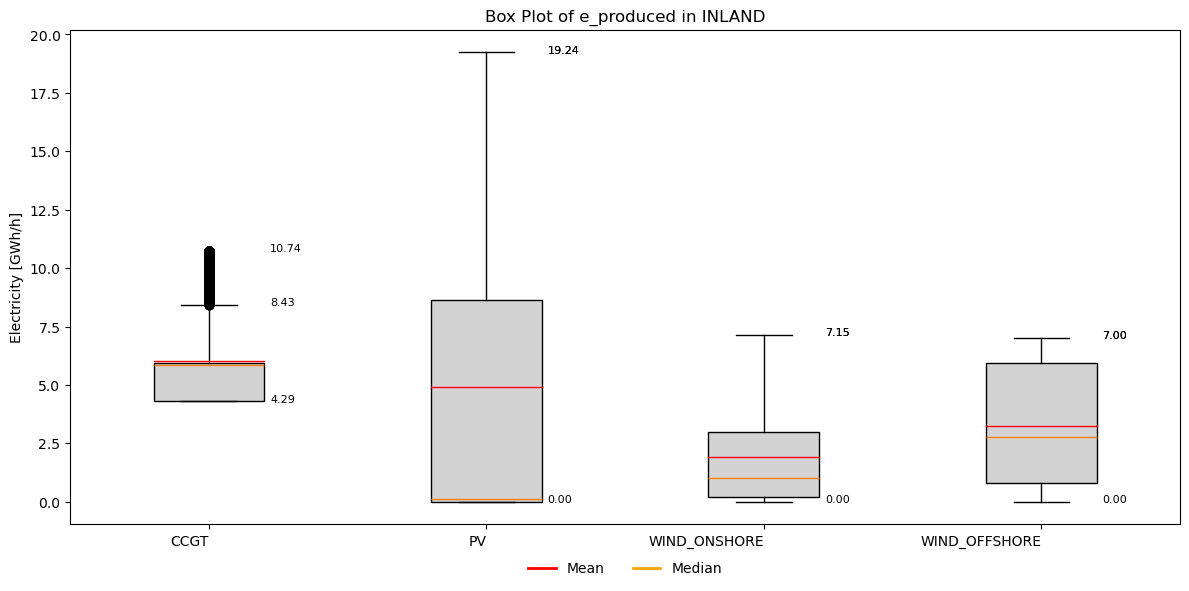

,Node,Mean,Median,Min,Max,Q1,Q3,Min Outlier,Max Outlier
0,CCGT,6.02,5.87,4.29,8.43,4.29,5.95,4.29,10.74
1,PV,4.92,0.12,0.00,19.24,0.00,8.64,0.00,19.24
2,WIND_ONSHORE,1.90,1.01,0.00,7.15,0.19,2.98,0.00,7.15
3,WIND_OFFSHORE,3.22,2.75,0.00,7.00,0.80,5.92,0.00,7.00


,Node,Mean,Median,Min,Max,Q1,Q3,Min Outlier,Max Outlier
0,CCGT,6.02,5.87,4.29,8.43,4.29,5.95,4.29,10.74
1,PV,4.92,0.12,0.00,19.24,0.00,8.64,0.00,19.24
2,WIND_ONSHORE,1.90,1.01,0.00,7.15,0.19,2.98,0.00,7.15
3,WIND_OFFSHORE,3.22,2.75,0.00,7.00,0.80,5.92,0.00,7.00


In [35]:
stat = pf.box_plot(
    data=e_prod,
    title='Box Plot of e_produced in INLAND', 
    y_label='Electricity [GWh/h]', 
    hue=None,
    box_color='lightgray', 
    mean_color='red',
    median_color='orange',
    widths=0.4,   
    to_plot='yes',
    to_annotate='yes',
    what_to_annotate=['min', 'max', 'max_outlier']
)

display(stat)

#### Bar plot

In [36]:
e_obj.variables.INLAND.e_produced

e_prod = pf.merge_dictionaries(pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_produced), pf.convert_mmr_to_dict(e_obj.variables.OFFSHORE.e_produced))

In [37]:
e_prod_dict = pf.transform_dict_into_table_several_column(e_prod) 

,BIOMASS,CCGT,CHP,FUEL_CELLS,NUCLEAR,OCGT,PV,WASTE,WIND_ONSHORE,WIND_OFFSHORE
0,0.0,5.948502,0.0,0.0,0.0,0.0,0.0,0.0,1.70883,5.95984
1,0.0,5.948502,0.0,0.0,0.0,0.0,0.0,0.0,1.84995,6.17272
2,0.0,5.948502,0.0,0.0,0.0,0.0,0.0,0.0,1.96965,6.25464
3,0.0,5.886335,0.0,0.0,0.0,0.0,0.0,0.0,2.01591,6.15400
4,0.0,5.890463,0.0,0.0,0.0,0.0,0.0,0.0,2.01591,6.05920
...,...,...,...,...,...,...,...,...,...,...
8755,0.0,5.074282,0.0,0.0,0.0,0.0,0.0,0.0,4.14972,6.88352
8756,0.0,4.294413,0.0,0.0,0.0,0.0,0.0,0.0,4.28562,6.86784
8757,0.0,4.294413,0.0,0.0,0.0,0.0,0.0,0.0,4.40082,6.86784
8758,0.0,4.579310,0.0,0.0,0.0,0.0,0.0,0.0,4.43835,6.93056


In [38]:
e_energy = pf.merge_dictionaries(pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_produced), pf.convert_mmr_to_dict(e_obj.variables.OFFSHORE.e_produced))
e_cap = pf.merge_dictionaries(pf.convert_mmr_to_dict(e_obj.capacities.INLAND.e_produced), pf.convert_mmr_to_dict(e_obj.capacities.OFFSHORE.e_produced))

pf.transform_dict_into_table_several_column(e_cap)

,BIOMASS,CCGT,CHP,FUEL_CELLS,NUCLEAR,OCGT,PV,WASTE,WIND_ONSHORE,WIND_OFFSHORE
Preinstalled capacity,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Added capacity,0.0,10.736033,0.0,0.0,0.0,0.0,50.0,0.0,9.0,8.0
Total capacity,0.0,10.736033,0.0,0.0,0.0,0.0,50.0,0.0,9.0,8.0
Max capacity,0.0,100.000000,0.0,100.0,0.0,100.0,50.0,0.0,9.0,8.0


,BIOMASS,CCGT,CHP,FUEL_CELLS,NUCLEAR,OCGT,PV,WASTE,WIND_ONSHORE,WIND_OFFSHORE
Preinstalled capacity,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Added capacity,0.0,10.736033,0.0,0.0,0.0,0.0,50.0,0.0,9.0,8.0
Total capacity,0.0,10.736033,0.0,0.0,0.0,0.0,50.0,0.0,9.0,8.0
Max capacity,0.0,100.000000,0.0,100.0,0.0,100.0,50.0,0.0,9.0,8.0


In [39]:
e_prod_cap = pf.cap_pow_energy_dict(
                        energy_dict= e_energy,
                        capacity_dict= e_cap,
                        unit_power = '[GW]',
                        unit_energy = '[TWh]', total_return = 'no')

pf.transform_dict_into_table_several_column(e_prod_cap)


,BIOMASS,CCGT,CHP,FUEL_CELLS,NUCLEAR,OCGT,PV,WASTE,WIND_ONSHORE,WIND_OFFSHORE
Total energy [TWh],0.0,52.70,0.0,0.0,0.0,0.0,43.14,0.0,16.61,28.21
Max capacity [GW],0.0,10.74,0.0,0.0,0.0,0.0,19.24,0.0,7.15,7.00
Min capacity [GW],0.0,4.29,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
Mean capacity [GW],0.0,6.02,0.0,0.0,0.0,0.0,4.92,0.0,1.90,3.22
Installed capacity [GW],0.0,10.74,0.0,0.0,0.0,0.0,50.00,0.0,9.00,8.00
Load factor,0.0,0.56,0.0,0.0,0.0,0.0,0.10,0.0,0.21,0.40


,BIOMASS,CCGT,CHP,FUEL_CELLS,NUCLEAR,OCGT,PV,WASTE,WIND_ONSHORE,WIND_OFFSHORE
Total energy [TWh],0.0,52.70,0.0,0.0,0.0,0.0,43.14,0.0,16.61,28.21
Max capacity [GW],0.0,10.74,0.0,0.0,0.0,0.0,19.24,0.0,7.15,7.00
Min capacity [GW],0.0,4.29,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00
Mean capacity [GW],0.0,6.02,0.0,0.0,0.0,0.0,4.92,0.0,1.90,3.22
Installed capacity [GW],0.0,10.74,0.0,0.0,0.0,0.0,50.00,0.0,9.00,8.00
Load factor,0.0,0.56,0.0,0.0,0.0,0.0,0.10,0.0,0.21,0.40


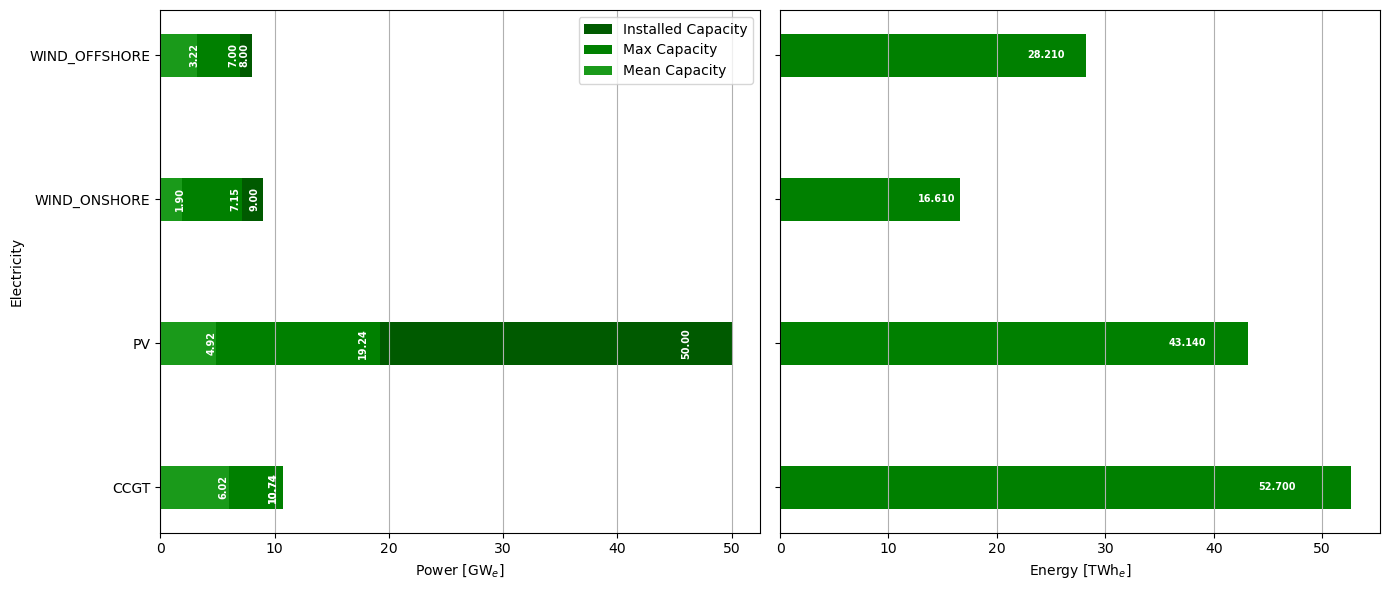

In [40]:
pf.bar_ploter_stack_dict(
                        data=e_prod_cap,  
                        color_palette = 'green',  
                        text_color= 'white',
                        cap_unit = 'Power [GW$_e$]',
                        ener_unit = 'Energy [TWh$_e$]',
                        commodity = 'Electricity',
                        percentage=0.92,
                        is_energy='no',
                        is_power='no',
                        plot_folder = plot_folder) 

#### Load duration curves

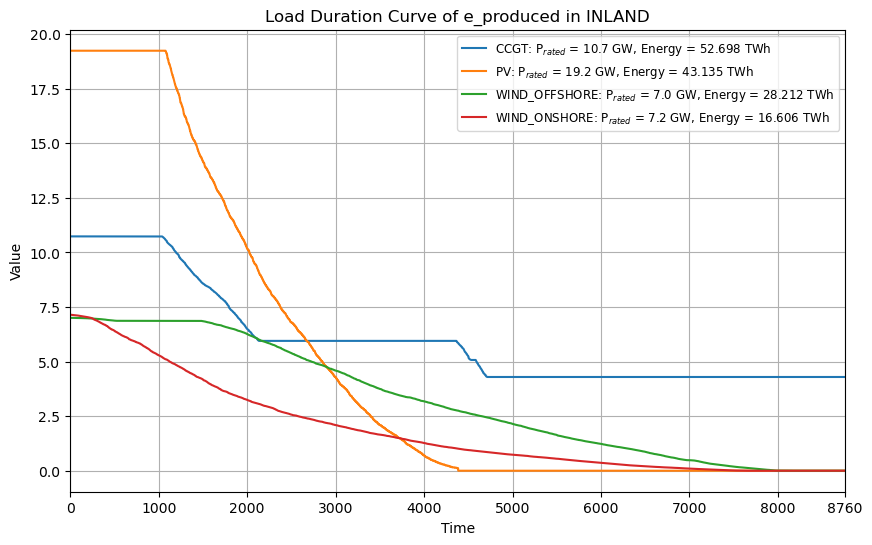

In [41]:
pf.load_duration_curves(data=e_energy, 
                        xlabel='Time [h]',
                        ylabel='Electricity [GWh/h]',
                        title='Load Duration Curve of e_produced in INLAND',
                        unit_cap = 'GW',
                        unit_energy = 'TWh', 
                        is_together = 'no',  )

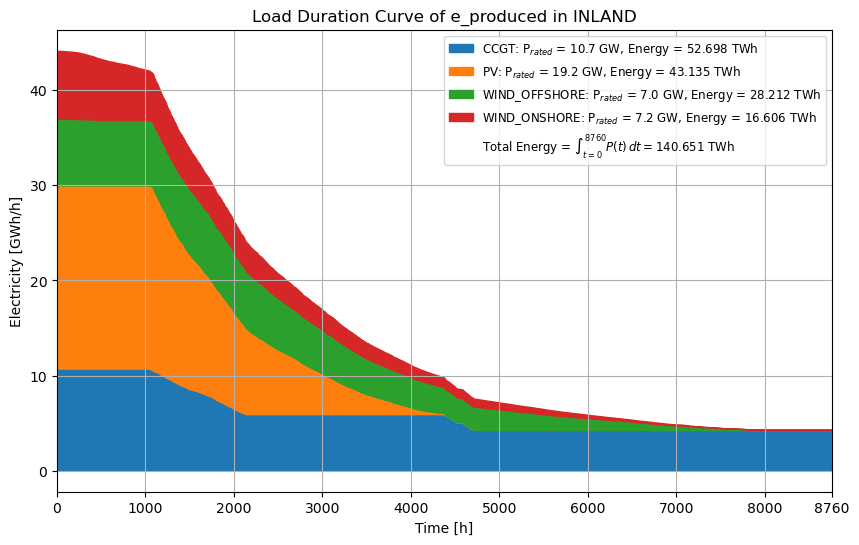

In [42]:
pf.load_duration_curves(data=e_energy, 
                        xlabel='Time [h]',
                        ylabel='Electricity [GWh/h]',
                        title='Load Duration Curve of e_produced in INLAND',
                        unit_cap = 'GW',
                        unit_energy = 'TWh', 
                        is_together = 'yes',  )

#### Bar plot together 

In [43]:
e_obj.variables.what_in_it()

Keys: DENMARK, DEUTSCHLAND, FRANCE, HV_OFF_ZB, HV_ZB_INL, INLAND, LUXEMBOURG, NETHERLANDS, OFFSHORE, PIPE_H2_OFF_ZB, PIPE_H2_ZB_INL, PIPE_NG_ZB_INL, UNITED_KINGDOM, ZEEBRUGGE


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bar_ploter_stack_time_individual(data_prod, data_cons, data_demand=None, data_charged=None, 
                                     data_discharged=None, data_imported=None, data_exported=None,  
                                     time_horizon=8760, zoom='month'):
    """
    Plot individual production, consumption and storage flows over time with strong visible colors.
    """

    # Vérification
    def check_and_convert_data(data):
        if data is not None:
            if isinstance(data, dict):
                for key, value in data.items():
                    if not isinstance(value, (pd.Series, list, np.ndarray)):
                        raise TypeError(f"Expected pd.Series, list or ndarray, but got {type(value)} for key: {key}")
            else:
                raise TypeError(f"Expected a dictionary, but got {type(data)}")

    # Zoom simplifié
    def zoom_dict_values(data, zoom):
        if data is None:
            return None
        zoomed = {}
        for key, value in data.items():
            if isinstance(value, (pd.Series, np.ndarray)):
                value = value.tolist()
            if zoom == 'month':
                chunks = np.array_split(value, 12)
                value = [np.mean(chunk) for chunk in chunks]
            zoomed[key] = value
        return zoomed

    # --- Vérification ---
    for dataset in [data_prod, data_cons, data_demand, data_charged, data_discharged, data_imported, data_exported]:
        check_and_convert_data(dataset)

    # --- Zoom ---
    data_prod = zoom_dict_values(data_prod, zoom)
    data_cons = zoom_dict_values(data_cons, zoom)
    data_demand = zoom_dict_values(data_demand, zoom)
    data_charged = zoom_dict_values(data_charged, zoom)
    data_discharged = zoom_dict_values(data_discharged, zoom)
    data_imported = zoom_dict_values(data_imported, zoom)
    data_exported = zoom_dict_values(data_exported, zoom)

    # --- Préparer X ---
    n_steps = len(list(data_prod.values())[0])
    x = np.arange(n_steps)
    bar_width = 0.4

    fig, ax = plt.subplots(figsize=(18, 8))

    # --- Fonction de plot ---
    def plot_group(data, x_offset, color_list, label_suffix):
        if data is None:
            return
        for i, (key, values) in enumerate(data.items()):
            values = np.array(values)
            if len(values) != len(x):
                continue
            if np.all(values == 0):
                continue
            values = values   # GWh
            color = color_list[i % len(color_list)]
            ax.bar(x + x_offset, values, width=bar_width, label=f"{key} {label_suffix}", color=color, alpha=1.0)

    # --- Couleurs fortes ---
    production_colors = plt.get_cmap('tab10').colors
    consumption_colors = plt.get_cmap('Set1').colors
    demand_colors = [plt.get_cmap('Greys')(i) for i in np.linspace(0.4, 0.9, 10)]
    storage_colors = plt.get_cmap('Dark2').colors
    imported_colors = plt.get_cmap('Accent').colors
    exported_colors = plt.get_cmap('Paired').colors

    # --- Plot des groupes ---
    plot_group(data_prod, -bar_width/2, production_colors, '(Production)')
    plot_group(data_discharged, -bar_width/2, storage_colors, '(Discharged)')
    plot_group(data_cons, +bar_width/2, consumption_colors, '(Consumption)')
    plot_group(data_demand, +bar_width/2, demand_colors, '(Demand)')
    plot_group(data_charged, +bar_width/2, storage_colors, '(Charged)')
    plot_group(data_imported, -bar_width*1.5, imported_colors, '(Imported)')
    plot_group(data_exported, +bar_width*1.5, exported_colors, '(Exported)')

    # --- Mise en forme ---
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)
    ax.set_ylabel('Energy (GWh)')
    ax.set_title(f'Energy flows per {zoom.capitalize()}', fontsize=16)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # --- Légende propre ---
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=6, fontsize=9, frameon=False)

    plt.tight_layout()
    plt.show()


In [45]:
e_prod = pf.merge_dictionaries(pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_produced), pf.convert_mmr_to_dict(e_obj.variables.OFFSHORE.e_produced))
e_cons =pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_consumed)
e_disch = pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_discharged)
e_charg = pf.convert_mmr_to_dict(e_obj.variables.INLAND.e_charged)
e_demand = pf.merge_dictionaries(pf.convert_mmr_to_dict(e_obj.global_parameters.demand_el), pf.convert_mmr_to_dict(e_obj.global_parameters.demand_el_ht), pf.convert_mmr_to_dict(e_obj.global_parameters.daily_demand_for_electric_vehicle))

e_import = {}
for key in e_dict['variables'].keys():
    # print(key)
    
    buffer = e_dict['variables'][key]
    # print(buffer.keys())
    if 'e_imported' in buffer.keys():
        e_import[key] = e_dict['variables'][key]['e_imported']
        
print(e_import.keys())



e_export = {}
for key in e_dict['variables'].keys():
    # print(key)
    
    buffer = e_dict['variables'][key]
    # print(buffer.keys())
    if 'e_exported' in buffer.keys():
        e_export[key] = e_dict['variables'][key]['e_exported']
        
print(e_export.keys())

e_dict['variables']['DENMARK'].keys()

dict_keys(['DENMARK', 'DEUTSCHLAND', 'FRANCE', 'LUXEMBOURG', 'NETHERLANDS', 'UNITED_KINGDOM'])
dict_keys([])


dict_keys(['e_produced', 'e_imported'])

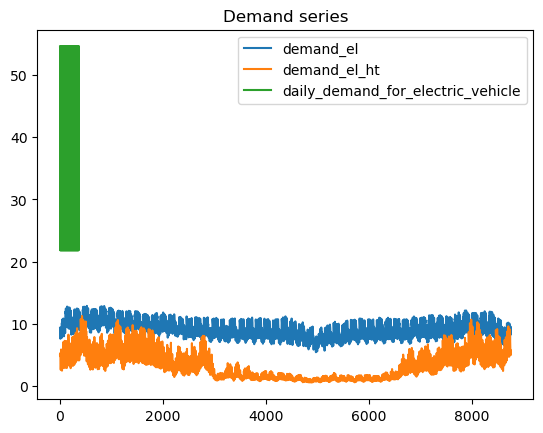

In [46]:
for key, values in e_demand.items():
    plt.plot(values, label=key)

plt.legend()
plt.title('Demand series')
plt.show()

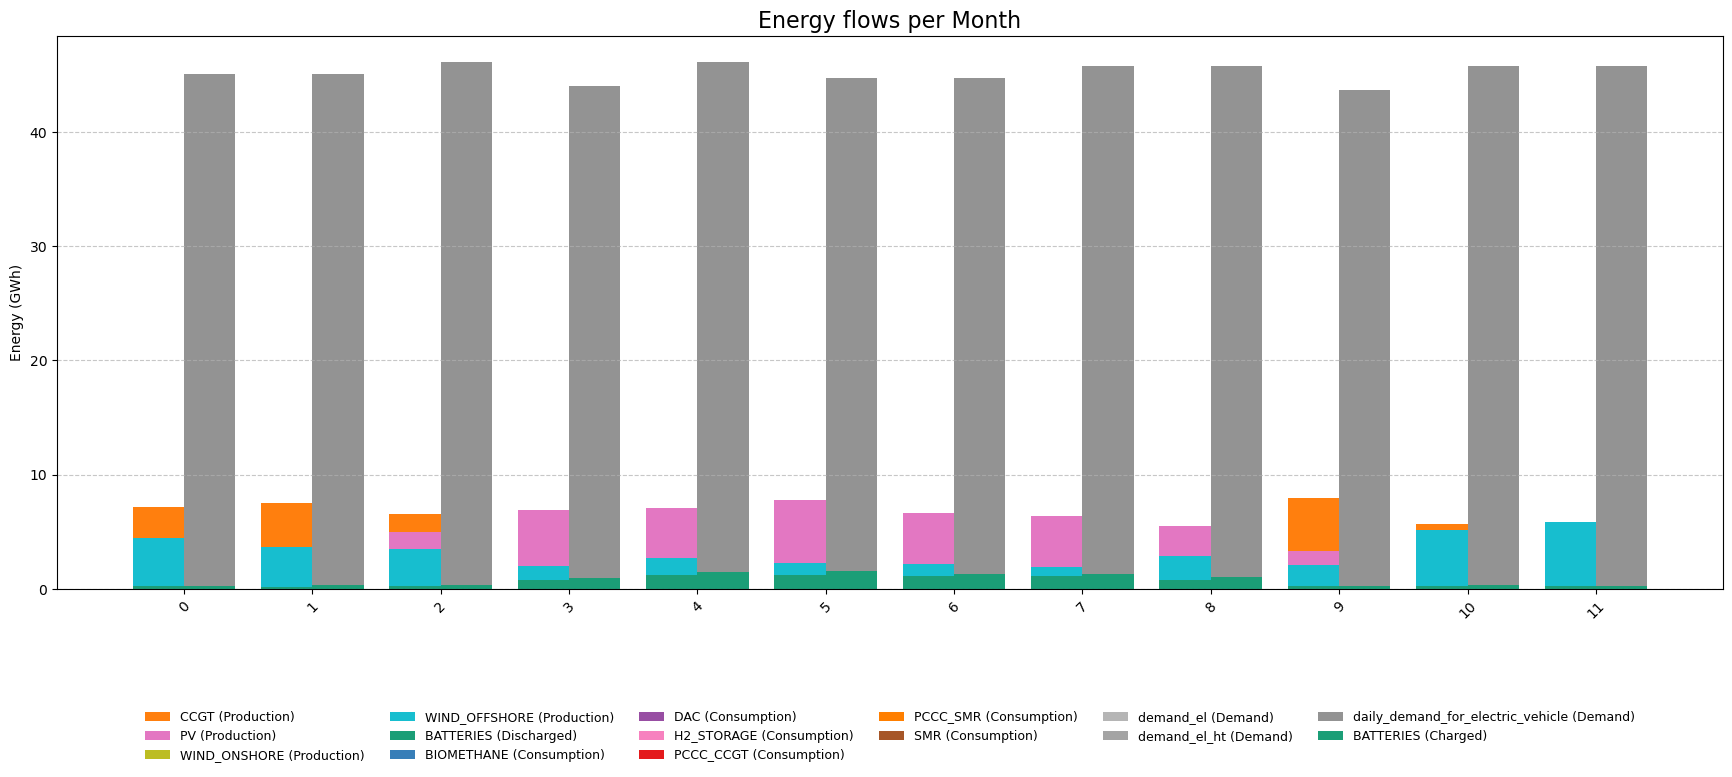

In [47]:
bar_ploter_stack_time_individual(data_prod=e_prod ,data_cons=e_cons,data_demand=e_demand,data_charged=e_charg,data_discharged=e_disch, )